
# Sampling

For various reasons it can be useful to work not on a data set as a whole but on a *sample* of the data. One reason to do this, of course, is to create training, test and validation sets for predictive modelling.

Here are some examples.

In [33]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Import data. Let's use the heatpump data.
dfhp = pd.read_csv("../data/heatpump_clean_filtered.csv")
dfhp

,timestamp,E_apparaten,E_warmtepomp,E_verbruik,overschot,hp_AAN,diff_temp_woonk,diff_temp_slaapk,Tussendeur,Buitendeur,Raam,Dag,day_of_week,month,year
0,2019-11-30 21:00:00,0.000000,0.000000,0.000000,0.000000,0.0,19.300000,17.800000,1.0,0.0,0.0,5,5,11,2019
1,2019-11-30 21:30:00,0.012299,0.455955,0.468254,0.000000,1.0,19.594167,18.094167,1.0,0.0,0.0,5,5,11,2019
2,2019-11-30 22:00:00,0.012543,0.464996,0.477539,0.000000,1.0,20.286389,18.884444,1.0,0.0,0.0,5,5,11,2019
3,2019-11-30 22:30:00,0.023764,0.538520,0.562284,0.000000,1.0,20.790278,19.390278,1.0,0.0,0.0,5,5,11,2019
4,2019-11-30 23:00:00,0.085571,0.608624,0.694196,0.000000,1.0,19.427222,18.223333,1.0,0.0,0.0,5,5,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244,2020-07-01 07:00:00,0.102798,0.002612,0.105410,0.000000,1.0,6.000000,6.600000,0.0,0.0,0.0,2,2,7,2020
10245,2020-07-01 07:30:00,0.092111,0.010005,0.102116,0.000000,1.0,5.947889,6.521833,0.0,0.0,0.0,2,2,7,2020
10246,2020-07-01 08:00:00,0.093163,0.007402,0.100565,0.001018,1.0,5.800000,6.300000,0.0,0.0,0.0,2,2,7,2020
10247,2020-07-01 08:30:00,0.088124,0.002610,0.090734,0.034967,1.0,5.646187,6.146187,0.0,0.0,0.0,2,2,7,2020


## Sampling using the Pandas sample method

Pandas comes with a simple but perfectly useful sampling function built in. Not surprisingly, it's called `sample`.

Some useful parameters:
- `n` : the number of samples to take.
- `frac` : the *fraction* of the data frame to return as a sample. Must be a number between 0.0 and 1.0.
- `random_state`: an integer value that locks the sample. If you supply this parameter, you can call the sample function again on the same data frame and expect the same result. If you do not supply this parameter, every call to the `sample` method will return a different sample.

For obvious reasons it is not possible to supply both the `n` parameter and the `frac` parameter at the same time.

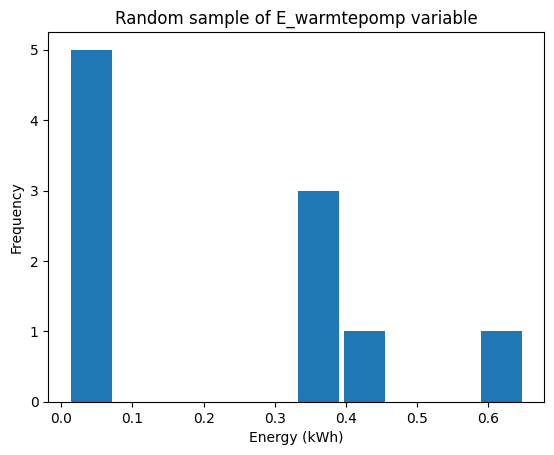

In [11]:
dfhp.sample(n=10, random_state=42)['E_warmtepomp'].plot.hist(rwidth=0.9, title='Random sample of E_warmtepomp variable', xlabel='Energy (kWh)')
plt.show()
# The random_state variable makes the sample reproducible. Try changing it.

# The scikit-learn train_test_split method


The scikit-learn package offers a convenient function for splitting up data into multiple samples called `train_test_split`. Unlike the `sample` method above it operates on one or more arrays or series. These should be the same length. It returns **two** new arrays or series for each original array or series, the first one of which is considered to be the training set and the second one of which is considered to be the test set.

Like the `sample` method the `train_test_split` method has a parameter `random_state` that locks the sample so it can be reproduced. Other parameters include:

- `test_size` and `train_size` : the size of the two resulting samples for each original array or series. Can be an integer, in which case it will return sets of exactly that size, or a float between 0.0 and 1.0 in which case it will split up the original sets according to the ratio between `test_size` and `train_size`.
- `stratify`: a particularly useful parameter that causes the samples to contain an equal proportion of the different values in the column you supply as a value to this parameter. See below for an example.


In [31]:
e_warmtepomp_train, e_warmtepomp_test, diff_temp_woonk_train, diff_temp_woonk_test = train_test_split(dfhp['E_warmtepomp'], dfhp['diff_temp_woonk'], test_size = 0.25, train_size = 0.75)
print(f"E_warmtepomp train data: {e_warmtepomp_train.size} data points.")
print(f"diff_temp_woonk train data: {diff_temp_woonk_train.size} data points.")
print(f"E_warmtepomp test data: {e_warmtepomp_test.size} data points.")
print(f"diff_temp_woonk test data: {diff_temp_woonk_test.size} data points.")

E_warmtepomp train data: 7686 data points.
diff_temp_woonk train data: 7686 data points.
E_warmtepomp test data: 2563 data points.
diff_temp_woonk test data: 2563 data points.


The code below illustrates the use of the `stratifiy` parameter. This example uses only a single column (array or series) but it is possible to pass multiple  dataframe columns to the stratify parameter. train_test_split will then ensure the train and test sets are balanced for all those columns.

In [32]:
unbalanced = [2, 2, 3, 3, 3, 3, 3, 3, 3, 3]

print(f'Not stratified: {train_test_split(unbalanced, random_state = 11)}')
print(f'Stratified: {train_test_split(unbalanced, stratify = unbalanced, random_state = 9)}')


Not stratified: [[3, 3, 3, 2, 3, 2, 3], [3, 3, 3]]
Stratified: [[3, 3, 3, 2, 3, 3, 3], [3, 3, 2]]
